In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("marketing_campaign_dataset.csv")
print(df.head())
print(df.info())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [6]:
# clean currency
df["Acquisition_Cost"] = (
    df["Acquisition_Cost"]
    .replace(r"[$,]", "", regex=True)
    .astype(float)
)
avg_spend = df.groupby("Campaign_ID")["Acquisition_Cost"].sum().mean()
print("Average spend per customer:", round(avg_spend, 2))  

Average spend per customer: 12504.39


In [7]:
threshold = df["Acquisition_Cost"].quantile(0.90)
top_spenders = df[df["Acquisition_Cost"] >= threshold]
print("Threshold:", threshold)
print("Top 10% customers:\n", top_spenders.head())

Threshold: 18524.0
Top 10% customers:
     Campaign_ID              Company Campaign_Type Target_Audience Duration  \
18           19    Alpha Innovations  Social Media       Men 25-34  60 days   
40           41   DataTech Solutions  Social Media        All Ages  30 days   
53           54       NexGen Systems       Display     Women 35-44  45 days   
80           81  Innovate Industries    Influencer     Women 35-44  60 days   
86           87   DataTech Solutions         Email     Women 25-34  15 days   

   Channel_Used  Conversion_Rate  Acquisition_Cost   ROI  Location  Language  \
18   Google Ads             0.07           19224.0  6.08  New York    French   
40      Website             0.04           18684.0  4.57  New York    French   
53      YouTube             0.02           19832.0  3.35  New York   English   
80   Google Ads             0.14           19300.0  7.62     Miami  Mandarin   
86      YouTube             0.15           19026.0  2.22     Miami  Mandarin   

    C

Skewness values:

Clicks              0.001423
Impressions        -0.004118
Engagement_Score    0.002551
dtype: float64


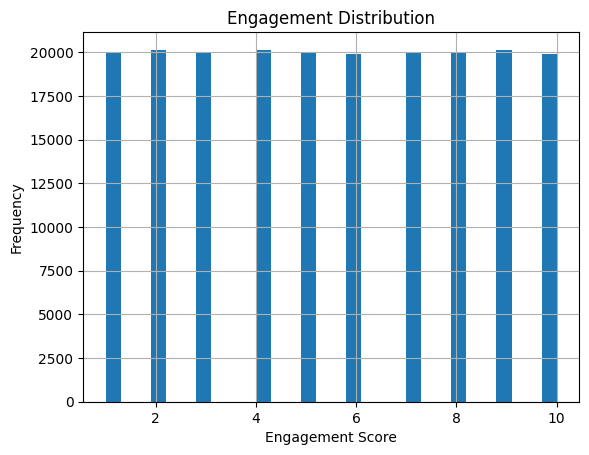

In [8]:
print("Skewness values:\n")
print(df[["Clicks", "Impressions", "Engagement_Score"]].skew())
df["Engagement_Score"].hist(bins=30)
plt.xlabel("Engagement Score")
plt.ylabel("Frequency")
plt.title("Engagement Distribution")
plt.show()


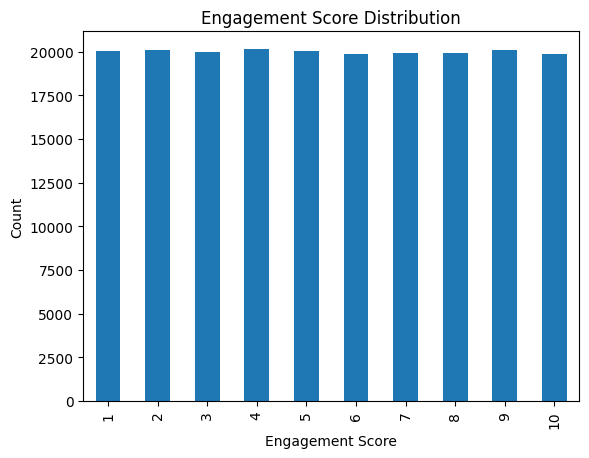

In [9]:
df["Engagement_Score"].value_counts().sort_index().plot(kind="bar")

plt.xlabel("Engagement Score")
plt.ylabel("Count")
plt.title("Engagement Score Distribution")
plt.show()


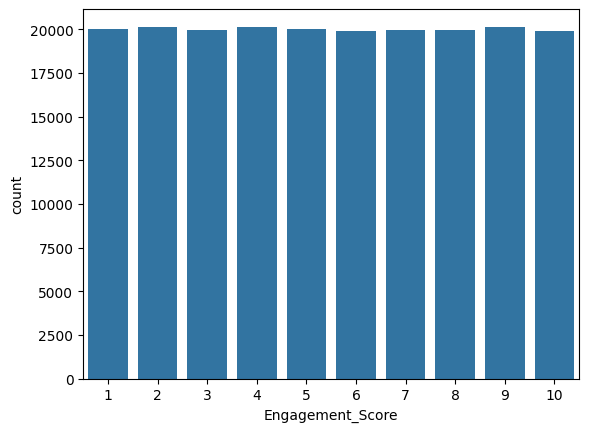

In [10]:
import seaborn as sns
sns.countplot(x="Engagement_Score", data=df)
plt.show()
